### Import libraries to perform data analysis, manipulation and visualizations 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')   ## Supress warnings 


In [2]:
# reading the dataset 
df = pd.read_csv('vgsales.csv')

In [3]:
#Visualizing the first 5 rows of the data 
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

## Dataset information

The dataset has the amount of 16719 rows and 16 columns in which 9 columns has been identified as dtype:float64 and 7 out of 16 has been identified as object.
It also can be seen that some columns has missing values. 
    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
#Identifying missing values 
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

## Handling Missing values - 
In order to handle the missing values it will be implemented different methods to deal with the NAN values like for example: the dropna(), The imputation fillna() method using mean, median and mode. Also, another method called Random Sample Imputation.

It has been observed the following missing values in the features below: 
    
Name - 2

Year_of_Release - 269

Genre - 2

Publisher - 54

Critic_Score - 8582

Critic_Count - 8582

User_Score - 6704

User_Count - 9129

Developer - 6623

Rating - 6769


#### Drop missing values in following columns: 'Name', 'Year_of_Release', 'Genre', 'Publisher'

As the amount of missing values in the following colums: Name, Year_of_release, Genre and Publisher are very small and account for less than 10% of my data, I have decided to drop them as it will not have an impact on my further analysis. 

In [6]:
# Drop missing values in following columns: 
df2 = df.dropna(subset=['Name', 'Year_of_Release', 'Genre', 'Publisher'])
df2.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         6579
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

Here, I have converted the column Year_of_release into integer as it has considered as a float dtype, I believe it would be ideal and clear to have this feature converted into integer format for the analysis. 

In [7]:
# Transfor columns: Year_of_Release into integer and also User_Score into float as it is a numerical feature dtype. 

df2['Year_of_Release'] = df2['Year_of_Release'].astype(int)

In [8]:
df2.replace('tbd', np.NaN, inplace=True)

In [9]:
df2['User_Score'] = df2['User_Score'].astype(float)
df2.dtypes

Name                object
Platform            object
Year_of_Release      int32
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

### For the categorical features:'Developer' and 'Rating' I have implemented the fillna method to fill the missing values with the mode function. 

### I have plot the two features with and without the fillna(mode) method to compare whether or not the dataset distribution changes. 

In [10]:
# Creating a new variable to fill missing values in the following object features with the mode method. 
df_mode = df2.fillna({
    'Developer': df2['Developer'].mode()[0],    # Fill NaN in 'Developer' with mode
    'Rating': df2['Rating'].mode()[0]           # Fill NaN in 'Rating' with mode
})


### Figures plots below: 

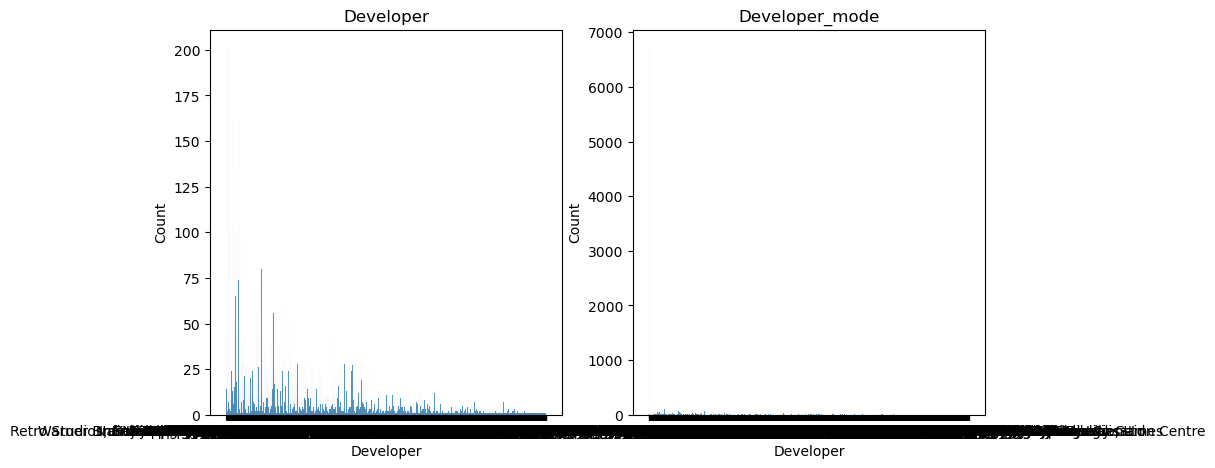

In [11]:
fig = plt.figure(figsize=(10, 5)) 

# add subplots 
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plot the first subplot
sns.histplot(df2.Developer, kde=False, ax=ax1)
ax1.set_title('Developer')

#Plot the second subplot 
sns.histplot(df_mode.Developer, kde=False, ax=ax2)
ax2.set_title('Developer_mode')

# show plot
plt.show()





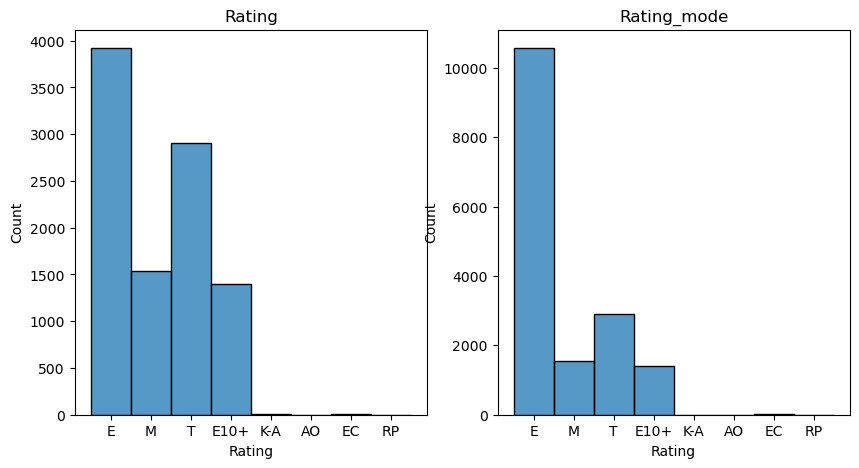

In [12]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plot the first subplot
sns.histplot(df2.Rating, kde=False, ax=ax1)
ax1.set_title('Rating')

# Plot the second subplot
sns.histplot(df_mode.Rating, kde=False, ax=ax2)
ax2.set_title('Rating_mode')

# show plot
plt.show()


### As it can see above the implementation of fillna(mode) method for the categorical features: 'Developer' and 'Rating' has changed their distributions and for this reason I have decided to not fill the NAN values for these two columns with this method. 

In [13]:
# Replace NaN values with 'unknown'
#df2.fillna({'Developer': 'unknown', 'Rating': 'unknown'}, inplace=True)
#df2.isnull().sum()


## Implementing imputation fillna() method using the Mean for the columns: 'Critic_Score', 'Critic_Count', 'User_Count', 'User_Score'. 

The mean imputation would be the ideal for a normal distribution dataset as it is sensitive to outliers. It is a easy method to apply and do not require additional data. On the other hand, it may not have a good representation of the central tendency of the data due to outliers sensitiveness. (Datacamp, Jan. 2023, www.datacamp.com/tutorial/techniques-to-handle-missing-data-values. Accessed 1 Apr. 2024)

In [14]:
# Implementing fillna(mean) method
df_mean = df2.fillna(df2[['Critic_Score', 'Critic_Count', 'User_Count', 'User_Score']].mean())
df_mean.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii             2006        Sports  Nintendo   
1         Super Mario Bros.      NES             1985      Platform  Nintendo   
2            Mario Kart Wii      Wii             2008        Racing  Nintendo   
3         Wii Sports Resort      Wii             2009        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53     76.000000   
1     29.08      3.58      6.81         0.77         40.24     68.997119   
2     15.68     12.76      3.79         3.29         35.52     82.000000   
3     15.61     10.93      3.28         2.95         32.77     80.000000   
4     11.27      8.89     10.22         1.00         31.37     68.997119   

   Critic_Count  User_Score  User_Count Developer Rating  
0     51.000000      8.0000  322.000000  Nintendo      E  
1     26.440992      7.1269  163.008846       NaN    NaN  
2     73.000000      8.3000  709.000000  Nintendo      E  
3     73.000000      8.0000  192.000000  Nintendo      E  
4     26.440992      7.1269  163.008846       NaN    NaN

### Critic_Score distribution with and without fillna(mean) method

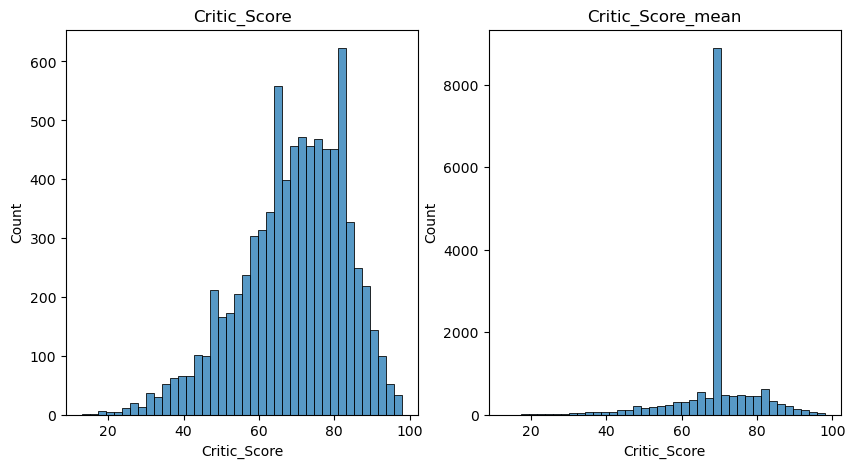

In [15]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plot the first subplot
sns.histplot(df2.Critic_Score, kde=False, bins=40, ax=ax1)
ax1.set_title('Critic_Score')

# Plot the second subplot 
sns.histplot(df_mean.Critic_Score, kde=False, bins=40, ax=ax2)
ax2.set_title('Critic_Score_mean')

# Show plot 
plt.show()


### Critic_Count distribution with and without fillna(mean) method

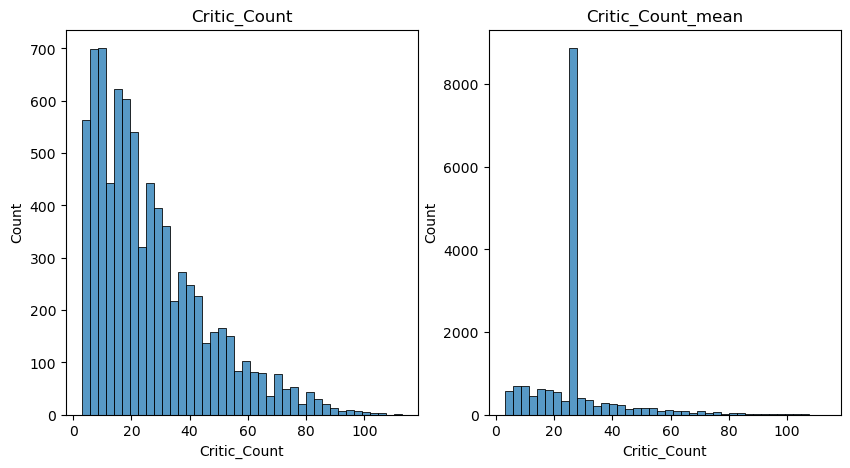

In [16]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plot the first subplot 
sns.histplot(df2.Critic_Count, kde=False, bins=40, ax=ax1)
ax1.set_title('Critic_Count')

# Plot the second subplot
sns.histplot(df_mean.Critic_Count, kde=False, bins=40, ax=ax2)
ax2.set_title('Critic_Count_mean')

# Show plot 
plt.show()

### User_Score distribution with and without fillna(mean) method

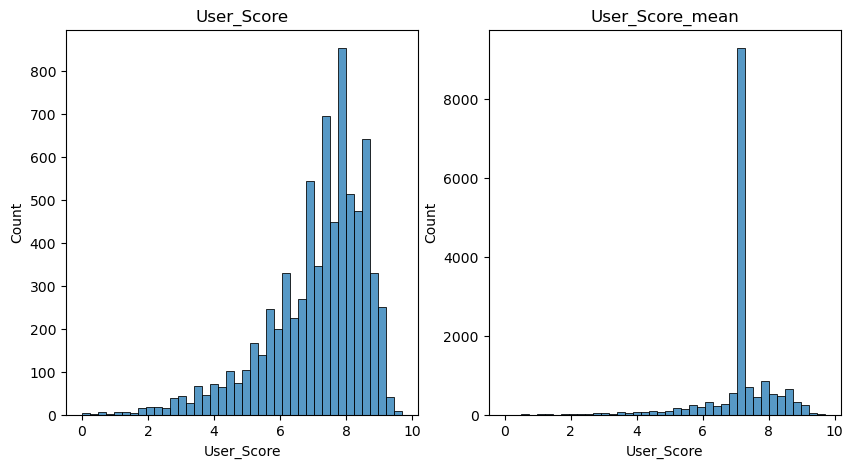

In [17]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plot the first subplot 
sns.histplot(df2.User_Score, kde=False, bins=40, ax=ax1)
ax1.set_title('User_Score')

# Plot the second subplot 
sns.histplot(df_mean.User_Score, kde=False, bins=40, ax=ax2)
ax2.set_title('User_Score_mean')

# Show plot 
plt.show()

### User_Count distribution with and without fillna(mean) method

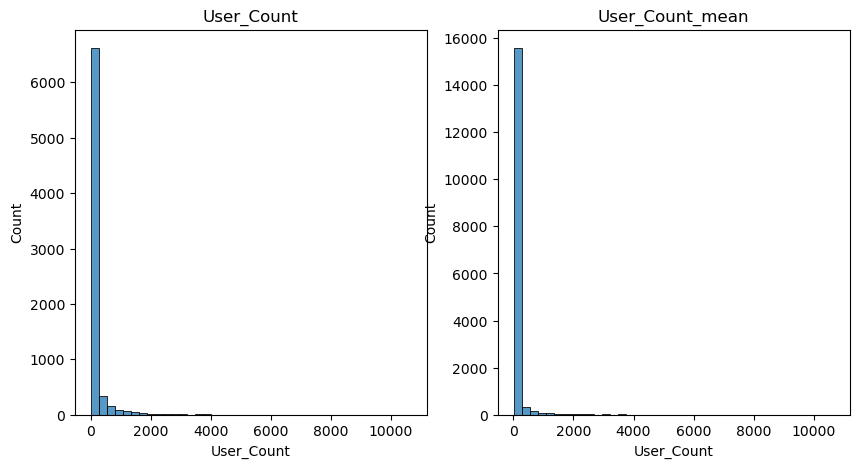

In [18]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plot the first subplot 
sns.histplot(df2.User_Count, kde=False, bins=40, ax=ax1)
ax1.set_title('User_Count')

# Plot the second subplot 
sns.histplot(df_mean.User_Count, kde=False, bins=40, ax=ax2)
ax2.set_title('User_Count_mean')

# Show subplot 
plt.show()

## Implementing imputation fillna() method using the median for the columns: 'Critic_Score', 'Critic_Count', 'User_Count', 'User_Score'. 

The median imputation has similar results as the mean method and it would be a recommended method for skewed dataset. However, likewise the mean it may not have a good representation of the central tendency of the data. (Datacamp, Jan. 2023, www.datacamp.com/tutorial/techniques-to-handle-missing-data-values. Accessed 1 Apr. 2024)



In [19]:
# Implementing fillna(median) method
df_median = df2.fillna(df2[['Critic_Score', 'Critic_Count', 'User_Count', 'User_Score']].median())


In [20]:
df_median.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii             2006        Sports  Nintendo   
1         Super Mario Bros.      NES             1985      Platform  Nintendo   
2            Mario Kart Wii      Wii             2008        Racing  Nintendo   
3         Wii Sports Resort      Wii             2009        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24          71.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37          71.0   

   Critic_Count  User_Score  User_Count Developer Rating  
0          51.0         8.0       322.0  Nintendo      E  
1          22.0         7.5        24.0       NaN    NaN  
2          73.0         8.3       709.0  Nintendo      E  
3          73.0         8.0       192.0  Nintendo      E  
4          22.0         7.5        24.0       NaN    NaN

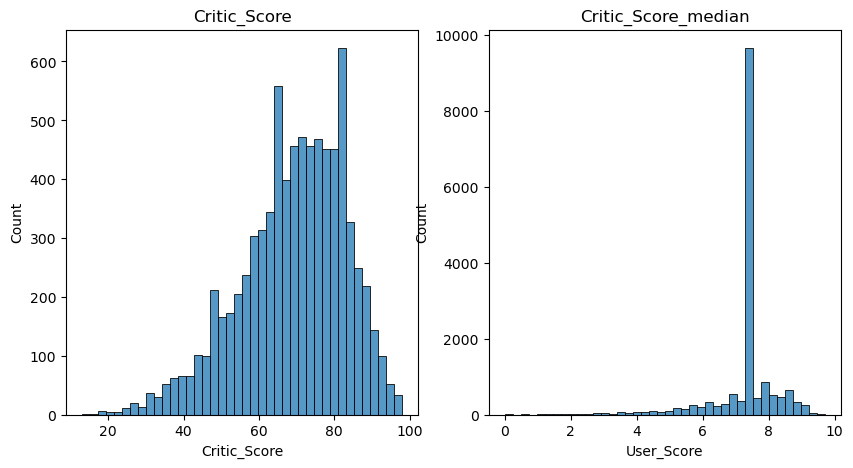

In [21]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plot the first subplot
sns.histplot(df2.Critic_Score, kde=False, bins=40, ax=ax1)
ax1.set_title('Critic_Score')

# Plot the second subplot 
sns.histplot(df_median.User_Score, kde=False, bins=40, ax=ax2)
ax2.set_title('Critic_Score_median')

# show plot 
plt.show()

## Random Sample Imputation 

The Random Sample imputation requires some additional steps because it will create two subsets of dataset from the original one in order to replace the missing values. 
In the first subset of the data there is all the variables without missing values, so the second one there are the ones with the NAN values. 
Then, randomly it will be selecting an observation from each subset. Moreover, the NAN value of the previous observation that was selected will be replaced with the existing values from the observation without missing values. 
The process will continue with this loop until there is no more NAN values.

It can be implemented to numerical and categorical data and it preserves the original distribution of the dataset. 
It assumes the data is missing completely at random (MCAR) and sometimes as the randomness may not work it could add some noise into the data, thus having an impact on the analysis. 
(Datacamp, Jan. 2023, www.datacamp.com/tutorial/techniques-to-handle-missing-data-values. Accessed 1 Apr. 2024).


In [22]:
def random_sample_imputation(dfz):
    
    cols_with_missing_values = dfz.columns[dfz.isna().any()].tolist()
    for var in cols_with_missing_values:
        
        # Get the number of NaN values
        num_missing = dfz[var].isnull().sum()
        
        # Check if there are more NaN values than non-NaN values
        if num_missing > dfz[var].notnull().sum():
            
            # If so, sample with replacement
            random_sample_df = dfz[var].dropna().sample(num_missing, replace=True, random_state=0)
        else:
            # Otherwise, sample without replacement
            random_sample_df = dfz[var].dropna().sample(num_missing, replace=False, random_state=0)
            
        # Re-index the randomly extracted sample
        random_sample_df.index = dfz[dfz[var].isnull()].index
        
        # Fill NaN values with the randomly sampled values
        dfz.loc[dfz[var].isnull(), var] = random_sample_df
        
    return dfz


In [23]:
# Creating new dataframe 
dfz = df2.copy()
random_sample_imp_df = random_sample_imputation(df2)
random_sample_imp_df.head()


Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii             2006        Sports  Nintendo   
1         Super Mario Bros.      NES             1985      Platform  Nintendo   
2            Mario Kart Wii      Wii             2008        Racing  Nintendo   
3         Wii Sports Resort      Wii             2009        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24          69.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37          80.0   

   Critic_Count  User_Score  User_Count        Developer Rating  
0          51.0         8.0       322.0         Nintendo      E  
1          27.0         7.0        10.0  Electronic Arts      E  
2          73.0         8.3       709.0         Nintendo      E  
3          73.0         8.0       192.0         Nintendo      E  
4          44.0         7.2        20.0   Nerve Software      T

## After all the imputations implementation, it is possible to identify which method is better and preserves the original distribution of the dataset. 

In [24]:
!pip install miceforest

In [25]:
# Creating new column for the dataframes: df_mean, df_median and random_sample_imp_df
df_mean['Critic_Score_Imp'] = df_mean['Critic_Score']
df_median["Critic_Score_Imp"] = df_median["Critic_Score"]
random_sample_imp_df["Critic_Score_Imp"] = random_sample_imp_df["Critic_Score"]

### Plotting the original distribution of column 'Critic_Score' vs imputation with mean() and median()

It is clear that mean and median distribution are very distant from the original 'Critic_Score' feature data. Therefore, it is not a great method to impute the data. On the other hand, the Random Sample imputation distribution overlaps the original feature data, which means is a better way of  imputation in this case. 

<Axes: ylabel='Density'>

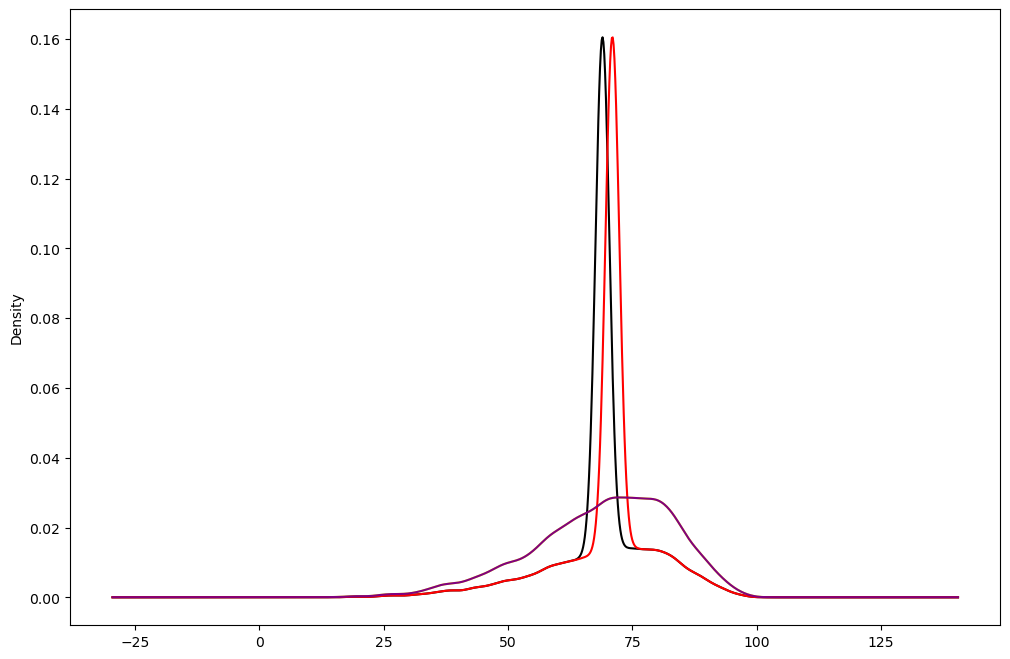

In [26]:
# Plot original column 'Critic_Score' distribution vs imputation methods to compare the results 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

df2["Critic_Score"].plot(kind='kde',color='yellow')
df_mean['Critic_Score_Imp'].plot(kind='kde', color='black')
df_median["Critic_Score_Imp"].plot(kind='kde',color='red')
random_sample_imp_df["Critic_Score_Imp"].plot(kind='kde',color='purple')

In [27]:
# Checking missing values in the new dataframe
random_sample_imp_df.isnull().sum()

Name                0
Platform            0
Year_of_Release     0
Genre               0
Publisher           0
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
Critic_Score        0
Critic_Count        0
User_Score          0
User_Count          0
Developer           0
Rating              0
Critic_Score_Imp    0
dtype: int64

In [28]:
# Statistical Summary 
random_sample_imp_df.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16416.000000  16416.000000  16416.000000  16416.000000   
mean       2006.489888      0.264129      0.146034      0.078623   
std           5.881148      0.819028      0.507134      0.311348   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Score  \
count  16416.000000  16416.000000  16416.000000  16416.000000  16416.000000   
mean       0.047670      0.536708     69.080836     26.520102      7.124537   
std        0.188156      1.559885     13.897755     18.998282      1.503451   
min        0.000000      0.010000     13.000000      3.000000      0.000000   
25%        0.000000      0.060000     60.000000     12.000000      6.400000   
50%        0.010000      0.170000     71.000000     22.000000      7.500000   
75%        0.030000      0.470000     80.000000     36.000000      8.200000   
max       10.570000     82.530000     98.000000    113.000000      9.700000   

         User_Count  Critic_Score_Imp  
count  16416.000000      16416.000000  
mean     163.462537         69.080836  
std      559.875983         13.897755  
min        4.000000         13.000000  
25%       10.000000         60.000000  
50%       25.000000         71.000000  
75%       81.000000         80.000000  
max    10665.000000         98.000000

## PART 1

### What are the top 5 games by global sales?  

Below I have plot a distribution of the 'Global_Sales' feature using a histogram plot. The category for this visualization falls into the Univariate one , which means that it will contain only one axis of information (x only). 
The histogram plot is used for visualize the distribution of one continuous variable or more. In the histogram the frequency or count of the number of observations is divided into bins. 

I have chosen to plot the original Distribution of 'Global_Sales' column using Seaborn histplot(), also I have plot beside it a log_scale version in which shows us the original skewed observation transformed close to a normal distribution. I have also applied a KDE(Kenel Density Estimate) curve,  which provide us a information about the density of the data. 
(Datacamp, Mar. 2023, www.datacamp.com/tutorial/seaborn-python-tutorial.)

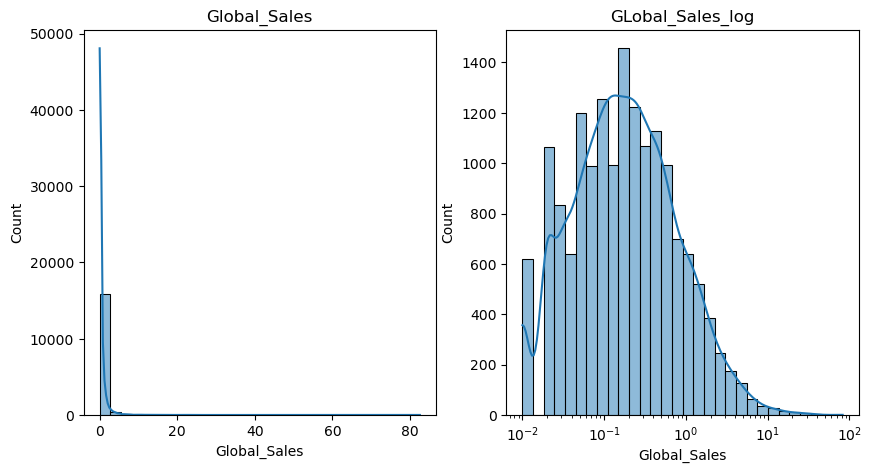

In [29]:
# Plot Global Sales Distribution 
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plot the first subplot 
sns.histplot(data=random_sample_imp_df, x="Global_Sales", kde=True, bins=30, ax=ax1)
ax1.set_title('Global_Sales')

# Plot the second subplot 
# Plot Global Sales Distribution with a Log_scale function 
sns.histplot(data=random_sample_imp_df, x="Global_Sales", log_scale=True, bins=30, kde=True, ax=ax2)
ax2.set_title('GLobal_Sales_log')

# Show subplot 
plt.show()

### What are the top 5 games by global sales? 

I have created the code below to find out what are the top 5 games' name sorting by Global Sales values. The variable top5_games has been created and it has show the most 5 popular games by Global Sales. 

In order to visualize this information I have chose a barplot in which we can see the representation of the categorical and continuous variables. Each bar of the barplot is a representation of the mean/or median of the continuos data. 

As the analysis is for a sales strategy for the upcoming Winter season, I believe that warm colors such as red, orange, purple from the Matplotlib library would be the ideal to transmite emotions like excitement and warmth which would work as part of the strategy for the upcoming Winter sales season. Also to emphasize the information and catch viewrs's eye. 

The purple color is one of the colors of the Qualitative pallete of Seaborn and Matplotlib color pallete, this pallete is suitable for representing categorical data. 

Font size Title: I have chosen as a pattern: Fontsize: 15 which is clear to read and visualize in this plot   
Labels Font size: Pattern 11, Clear to read
Size of the plot: (8,4) - It is a good size to demonstrate the necessary information. 


In [30]:
# Sort the data according to 'Global_Sales'
games_df = random_sample_imp_df.sort_values(by='Global_Sales', ascending=False)

# Select the top 5 games results 
top5_games = games_df.head(5)

# Visualising top5_games dataframe first 5 rows
top5_games[['Name', 'Global_Sales']].head()



Name  Global_Sales
0                Wii Sports         82.53
1         Super Mario Bros.         40.24
2            Mario Kart Wii         35.52
3         Wii Sports Resort         32.77
4  Pokemon Red/Pokemon Blue         31.37

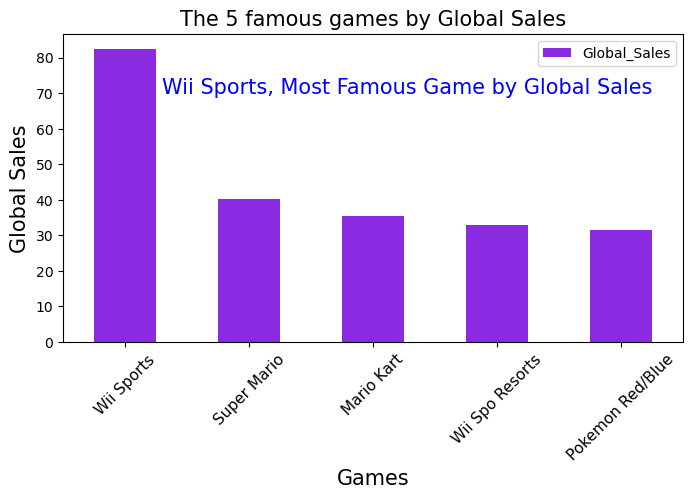

In [31]:
# Plot top5_games by Global_Sales
top5_games[['Name', 'Global_Sales']].plot(kind='bar', figsize=(8, 4), color='blueviolet')

#Title and labels
plt.title('The 5 famous games by Global Sales', fontdict={'fontsize' : 15}) # plot title
plt.xlabel('Games', fontdict={'fontsize' : 15})  #xlabel
plt.ylabel('Global Sales', fontdict={'fontsize' : 15}) #ylabel
plt.xticks([0, 1, 2, 3, 4], ['Wii Sports', 'Super Mario', 'Mario Kart', 'Wii Spo Resorts', 'Pokemon Red/Blue'], rotation=45, fontdict={'fontsize' : 11})    #rotation of x axis tick labels 

#annotation
plt.text(0.3, 70, "Wii Sports, Most Famous Game by Global Sales", fontsize=15, color="blue")

#show plot 
plt.show()

##  Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?  


In [32]:
# Filtering the data according to Year_of_Release from 2010-2014
sales_df = random_sample_imp_df[(random_sample_imp_df['Year_of_Release']>=2010) & (random_sample_imp_df['Year_of_Release']<=2014)]

# Create a new variable sales_subset selecting NA_Sales, JP_Sales from 2010-2014
sales_subset = sales_df[['NA_Sales', 'JP_Sales', 'Year_of_Release']]

#Visualise sales_subset dataframe first 5 rows 
sales_subset.head()
                                        

NA_Sales  JP_Sales  Year_of_Release
14     15.00      0.24             2010
16      7.02      0.98             2013
23      9.66      0.06             2013
27      5.51      5.65             2010
29      9.04      0.13             2011

### According to the Pearson correlation method, there is no correlation between these two variables and they are independent of each other. 

In [33]:
# Calculate the correlation using the method Pearson 
sales_subset.corr(method='pearson')  # (Avinash Navlani et al.)

NA_Sales  JP_Sales  Year_of_Release
NA_Sales         1.000000  0.260357         0.008494
JP_Sales         0.260357  1.000000         0.051393
Year_of_Release  0.008494  0.051393         1.000000

### To visualize the relationship between these two continuous variables: 'NA_Sales and 'JP_Sales, it will be used a scatter plot. This visualization falls into a bivariate category because it contains two axis of informaxion (x and y). 

I have used a scatter plot using Seaborn and Matplotlib to customize the plot. The palette color chosen is the muted pallete which in my opinion was the best option for visualize the different data points, althought it is a color palette recommended for categorical data. 

It has been used a bigger size of the plot to show the importance of the data points and their relationship. 

We can see that NA_Sales and JP_Sales has a similar concentration of sales, but NA_Sales has the highest number of sales, especially in the year of 2013 and 2012. While JP_Sales see an increase in sales in the year of 2013 and 2014. 

Font size Title: I have chosen as a pattern: Fontsize: 15 which is clear to read and visualize in this plot   
Labels Font size: Pattern 11, Clear to read, balance within the plot. 


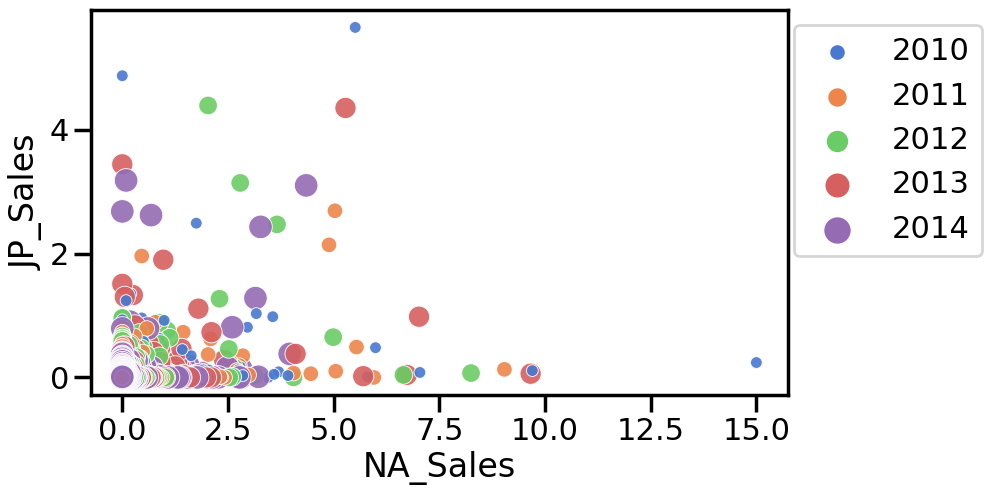

In [34]:
sns.set_context('poster')

plt.figure(figsize=(9,5));
sns.scatterplot(data=sales_df, x='NA_Sales', y='JP_Sales', hue='Year_of_Release', alpha=0.9, size='Year_of_Release', palette='muted');
## Move legend outside 
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1)); 

## What is the distribution of the most popular 4 game genres?  

Firstly, it has been used a histogram to visualize the original distribution of the feature 'Genre'. 

To find out what are the most popular 4 game genres, the code counts the frequency of each game genre first, then the genre count is sorted in order to identify the most popular ones, the four most common games is selected and it has been plotted using a bar plot in which the bars represents the mean of each variable. 

Font size Title: I have chosen as a pattern: Fontsize: 15 which is clear to read and visualize within the plot.   
Labels Font size: Pattern 9, Clear to read

Colors: Blue and orange because I have used the complementary concept of color theory to create a pleasant combination, matching the two colors that can be found opposite each other in the Color Wheel. (Mokkup.ai)



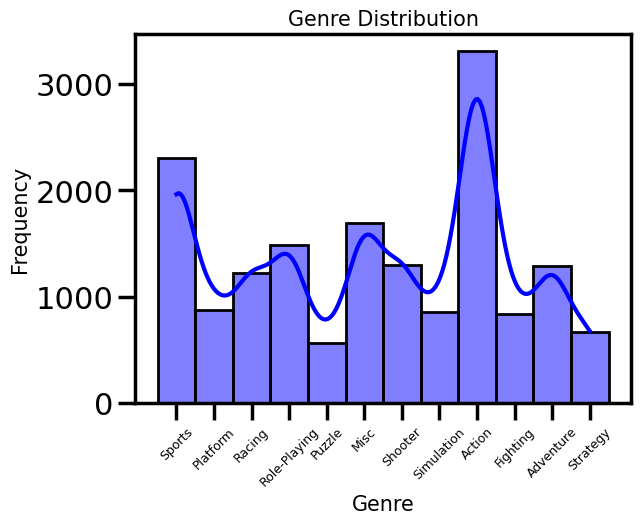

In [35]:
# Plot Genre distribution 
sns.histplot(x="Genre", data=random_sample_imp_df, kde=True, color='blue')

# add a title, xlabel, and ylabel to the plot using Matplotlib functions
plt.title("Genre Distribution", fontsize=15)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(rotation=45, fontsize=9)

# display the plot
plt.show()


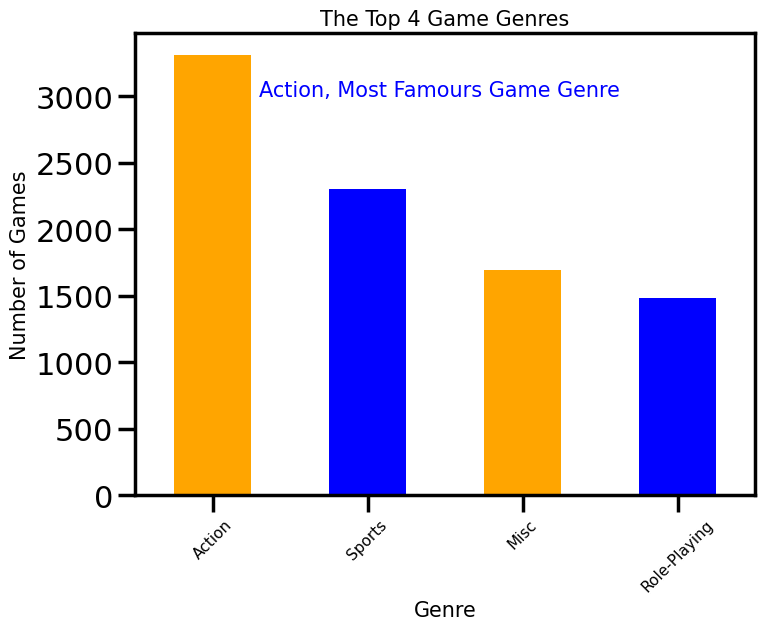

In [36]:
# Count the frequency of each genre
genre_count = random_sample_imp_df['Genre'].value_counts()

# Sort genre counts in descending order
sorted_genre_count = genre_count.sort_values(ascending=False)

# Select the top 4 genres
top4_genres = sorted_genre_count.head(4)

# Plot the distribution of the top 4 genres
top4_genres.plot(kind='bar', figsize=(8, 6), color=(['orange', 'blue']))
plt.title('The Top 4 Game Genres', fontsize=15)
plt.xlabel('Genre', fontsize=15 )
plt.ylabel('Number of Games', fontsize=15)
plt.xticks(rotation=45, fontsize=11)

plt.text(0.3, 3000, "Action, Most Famours Game Genre", fontsize=15, color="blue")


    
plt.show()


### Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  

A one-tailed statistical hypothesis has been used as we would like to know if the mean of EU_Sales of older games from 2005 and earlier is greater than newer games released after 2005 onwards. 

 Considering this: 
####  Null hypothesis -  H0: Older Games µ ≥ New Games

#### Alternative hypothesis - Ha: New Games µ =< Older Games 

#### As it has shown below, after executing the statistical hypothesis T-Test, as the p-value is greater than our significance level alpha, we have failed to reject the null hypothesis as there hasn't been sufficient evidence that tell us that the mean of new games is equal or less than the Older games. 



In [37]:
from scipy.stats import ttest_ind

older_games = random_sample_imp_df[random_sample_imp_df['Year_of_Release'] <= 2005]['EU_Sales'].dropna()
newer_games = random_sample_imp_df[random_sample_imp_df['Year_of_Release'] > 2005]['EU_Sales'].dropna()

# Compare samples
stat, p = ttest_ind(older_games, newer_games)

#print p-value and t-test 
print("p-values:",p)
print("t-test:",stat)

# 0.05 is the significance level 
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")


p-values: 0.6789044778836104
t-test: 0.4139659154689847
Hypothesis Accepted


## What are the 3 most common “developer” in the dataset?  

To find out what are the most common developer in the dataset, the code counts the frequency of each game developer using valu_counts function. 

Font size Title: I have chosen as a pattern: Fontsize: 15 which is clear to read and visualize within the plot.   
Labels Font size: Pattern 11, Clear to read
Colors: Blue, Blue-violet and purple as it has been used the analogus concept of color theory to bring harmony to the visualization. The picked 3 colors are found side by side in the Color Wheel and normally one of the colors is the predominant one. (Mokkup.ai)


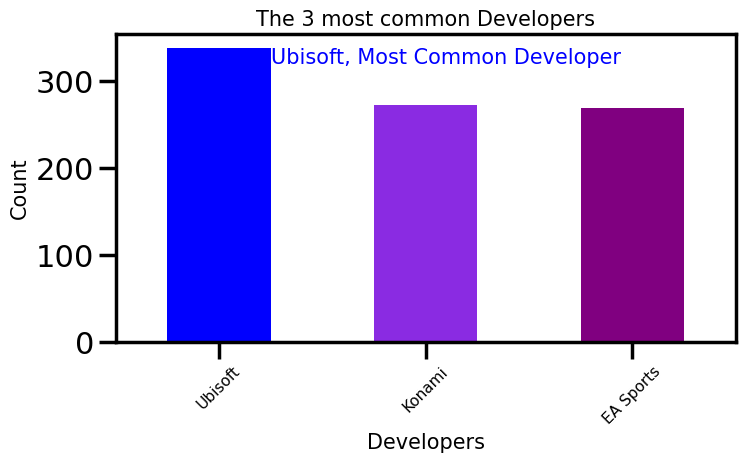

In [38]:
# Count the frequency number of each developer: 
devel_count = random_sample_imp_df['Developer'].value_counts()

#Selecting the 3 most common Developer: 
top3_devel = devel_count.head(3)

# Plot Developer's distribution 
top3_devel.plot(kind='bar', figsize=(8, 4), color=['blue', 'blueviolet', 'purple'])
plt.title('The 3 most common Developers', fontsize=15)
plt.xlabel('Developers', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45, fontsize=11)

plt.text(0.25, 320, "Ubisoft, Most Common Developer", fontsize=15, color="blue")

plt.show()

# Part2

### You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario.  


### In the visualization below we can see the mean with confidential intervals of the most successful genres by 'Global_Sales'. 

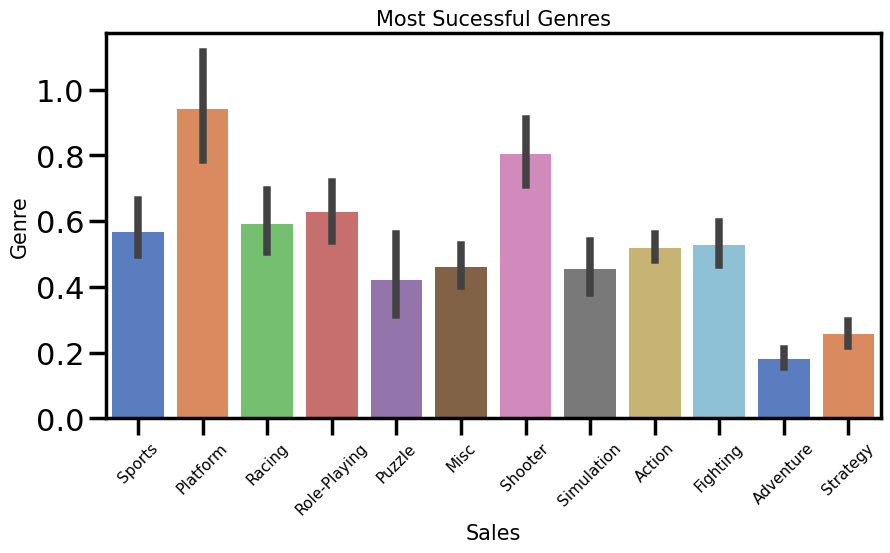

In [39]:
#Plot Genre vs Global Sales 
plt.figure(figsize=(10,5))
sns.barplot(y='Global_Sales', x='Genre',data=random_sample_imp_df, estimator='mean', errorbar='ci', palette='muted')
plt.ylabel('Genre', fontsize=15)
plt.xlabel('Sales', fontsize=15)
plt.title('Most Sucessful Genres', fontsize=15)
plt.xticks(rotation=45, fontsize=11)
plt.show()

## Most common game genre within all the regions: NA_Sales, EU_Sales, JP_Sales and Other_Sales

### We can see that Adventure, Action and Misc are the most popular games genre when we sum all the regions sales and other sales. On the other hand, adventure has the lowest value when analysed by 'Global_Sales' (figure plotted above). Also, the most common games genre by 'Global_Sales' are the Plataform, Shooter and Role-Playing. 

In [40]:
#Creating a new df containing regional sales and genres
sales = random_sample_imp_df[['Genre','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]
sales = sales.groupby('Genre').value_counts().reset_index()

sales = sales.melt(id_vars=['Genre'],var_name='Total',value_name='Total_Sales') #Turning the Regional Sales columns into a single column named Total

In [41]:
sales.head()

Genre     Total  Total_Sales
0  Action  NA_Sales         0.00
1  Action  NA_Sales         0.00
2  Action  NA_Sales         0.00
3  Action  NA_Sales         0.00
4  Action  NA_Sales         0.01

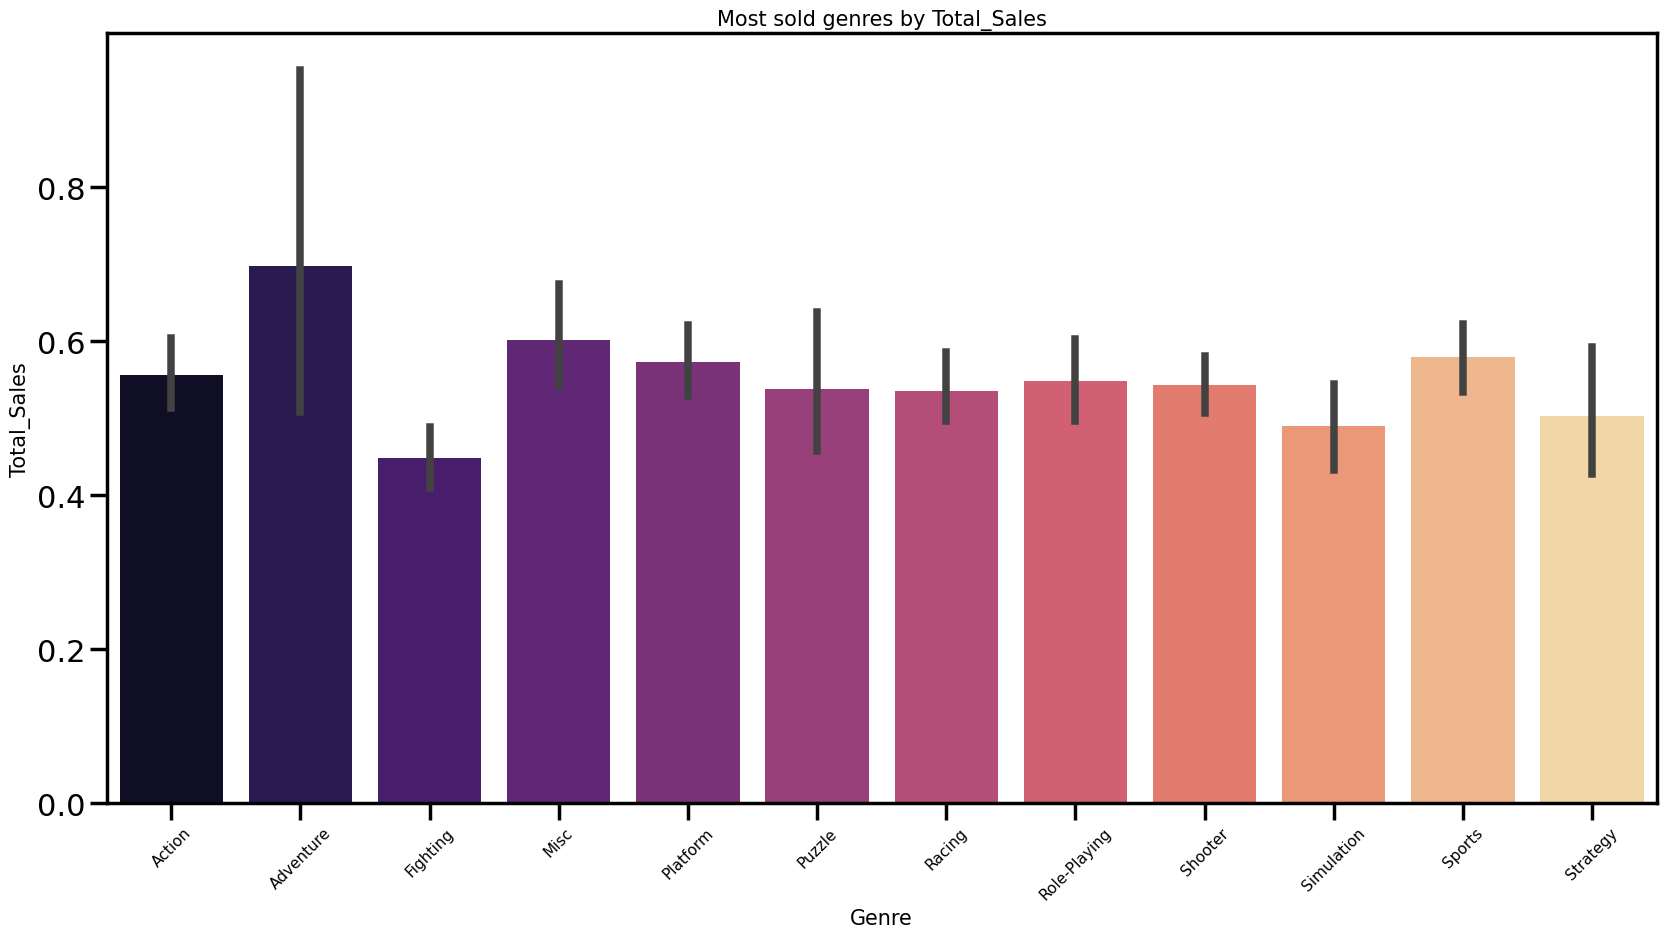

In [42]:
#Plotting total sales by genre 
plt.figure(figsize=(20,10))
sns.barplot(x='Genre',y='Total_Sales',data=sales, palette='magma')
plt.xlabel('Genre',size=15)
plt.ylabel('Total_Sales', fontsize=15)
plt.title('Most sold genres by Total_Sales', fontsize=15)
plt.xticks(rotation=45, fontsize=11)
plt.show()

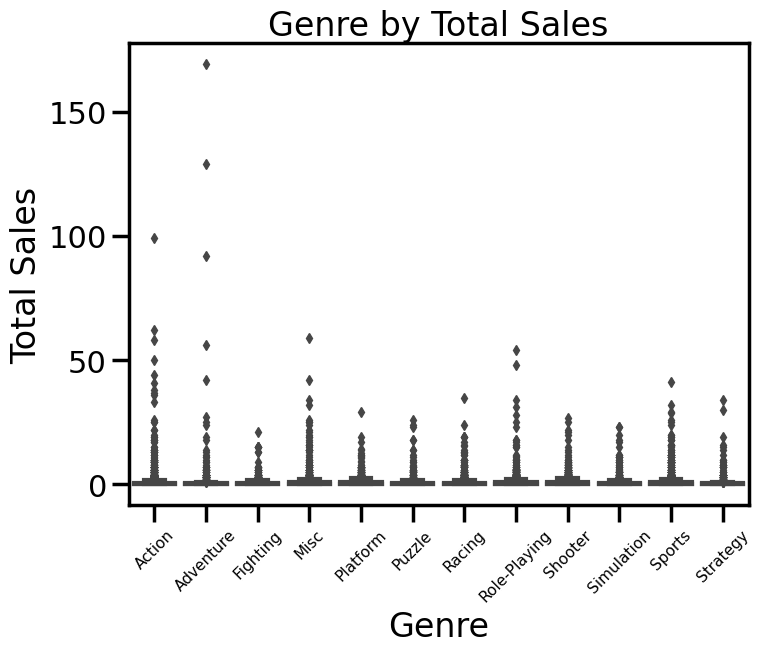

In [43]:
# A box plot visualizairon of Sales dataframe
plt.figure(figsize=(8,6))

sns.boxplot(x="Genre", y="Total_Sales", data=sales)

# Customize plot
plt.title("Genre by Total Sales")
plt.xlabel("Genre")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, fontsize=11)

plt.show()



## Total Sales by region: 

NA_Sales is the region with the highest sales of videogames, it has almost doubled the EU_Sales. EU_sales has the second place and JP_Sales the third one. 

It would be interesting for instance to explore new markets and implement strategies for the new sales Winter campaign in these regions where the sales are low.

In [44]:
# Creating a dataframe with total sales by region
area_sales = random_sample_imp_df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]
area_sales = area_sales.melt(var_name='Area', value_name='Total_Sales')
area_sales = area_sales.groupby('Area') ['Total_Sales'].sum().reset_index()
area_sales.head()

Area  Total_Sales
0     EU_Sales      2397.29
1     JP_Sales      1290.67
2     NA_Sales      4335.94
3  Other_Sales       782.55

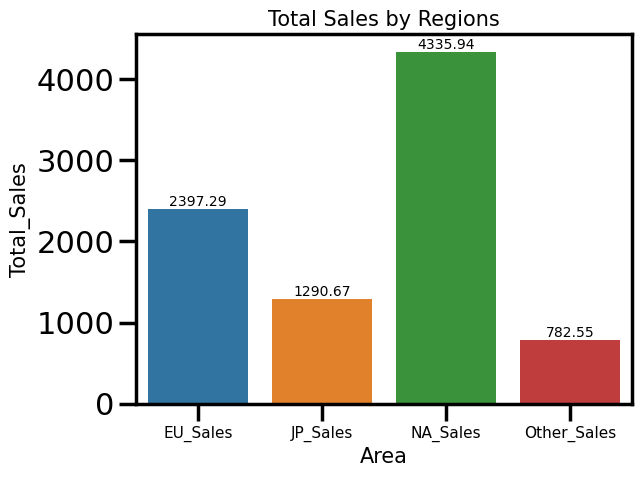

In [45]:
ax = sns.barplot(area_sales, x="Area", y="Total_Sales", estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);

plt.xlabel('Area',size=15)
plt.ylabel('Total_Sales', fontsize=15)
plt.title('Total Sales by Regions', fontsize=15)
plt.xticks(fontsize=11)

plt.show()

### Part 3 has been written in each session with the asked questions. 

In [46]:
!pip install plotly_express

In [47]:
#Sort years values from the column 'Year_of_release'
random_sample_imp_df.sort_values(by=['Year_of_Release'], inplace=True)
random_sample_imp_df.head()

Name Platform  Year_of_Release    Genre   Publisher  \
6301           Bridge     2600             1980     Misc  Activision   
6876         Checkers     2600             1980     Misc       Atari   
4019       Ice Hockey     2600             1980   Sports  Activision   
1764          Kaboom!     2600             1980     Misc  Activision   
546   Missile Command     2600             1980  Shooter       Atari   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
6301      0.25      0.02       0.0         0.00          0.27          65.0   
6876      0.22      0.01       0.0         0.00          0.24          49.0   
4019      0.46      0.03       0.0         0.01          0.49          60.0   
1764      1.07      0.07       0.0         0.01          1.15          63.0   
546       2.56      0.17       0.0         0.03          2.76          60.0   

      Critic_Count  User_Score  User_Count          Developer Rating  \
6301          27.0         8.5      1184.0            Cyanide      E   
6876           6.0         6.6       400.0   Arc System Works      T   
4019           6.0         8.5        11.0        Square Enix      E   
1764          37.0         7.5        22.0    Milestone S.r.l   E10+   
546           10.0         8.0         6.0  Digital Illusions      T   

      Critic_Score_Imp  
6301              65.0  
6876              49.0  
4019              60.0  
1764              63.0  
546               60.0

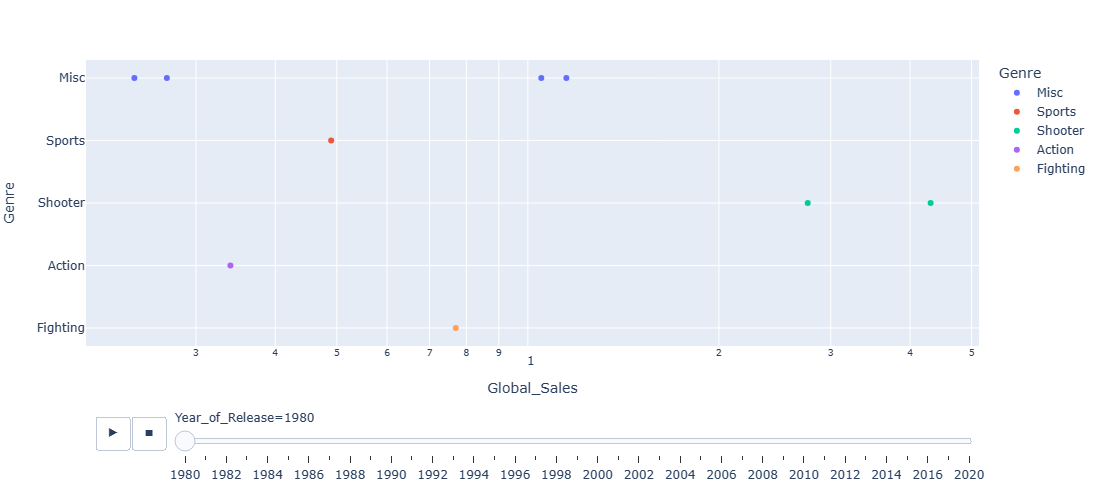

In [65]:
import plotly_express as px

fig = px.scatter(random_sample_imp_df, x='Global_Sales', y='Genre', animation_frame='Year_of_Release', 
                animation_group='Name', color='Genre', hover_name='Name', 
                width=1600, height=500, log_x=True,
                size_max=40)

fig.show()

## Github link: 

https://github.com/TatiHelena/Data_Visualization.git